In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats
%matplotlib inline

from os import getcwd
print(getcwd())

c:\Users\jmert\Documents\W&M\BUAD5112\M3


In [2]:
df = pd.read_csv('TSDataP1.csv')
df.head()

,Quarter,Product1Demand
0,1,152400
1,2,185000
2,3,182880
3,4,161544
4,5,166116


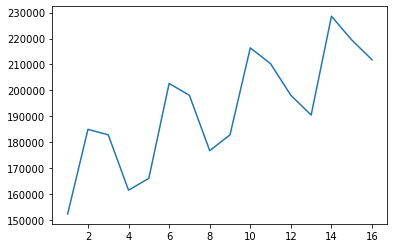

In [3]:
plt.plot(df.Quarter,df.Product1Demand)

In [4]:
# basic regression model
slope,intercept,r_value,p_value,std_err = stats.linregress(df.index,df['Product1Demand'])
print('intercept =',intercept,'slope =',slope,'p_value',p_value)

intercept = 165969.76470588235 slope = 3567.764705882353 p_value 0.0004266677252921289


In [5]:
def create_regress_col(row,intercept,slope):
    return float(intercept)+float(row['Quarter'])*slope

df['regress'] = df.apply(create_regress_col,args=(intercept,slope),axis='columns')
df['R1'] = df['Product1Demand']-df['regress']
df.style.format({
    'Product1Demand':'{:,.0f}'.format,
    'regress': '{:,.0f}'.format,
    'R1': '{:,.0f}'.format
})

,Quarter,Product1Demand,regress,R1
0,1,"152,400","169,538","-17,138"
1,2,"185,000","173,105","11,895"
2,3,"182,880","176,673","6,207"
3,4,"161,544","180,241","-18,697"
4,5,"166,116","183,809","-17,693"
5,6,"202,692","187,376","15,316"
6,7,"198,120","190,944","7,176"
7,8,"176,784","194,512","-17,728"
8,9,"182,880","198,080","-15,200"
9,10,"216,408","201,647","14,761"


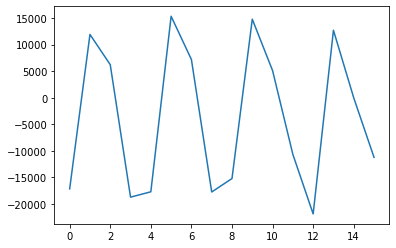

In [6]:
plt.plot(df.index,df.R1)

   Quarter  Product1Demand        regress            R1      lag4
0        1          152400  169537.529412 -17137.529412       NaN
1        2          185000  173105.294118  11894.705882       NaN
2        3          182880  176673.058824   6206.941176       NaN
3        4          161544  180240.823529 -18696.823529       NaN
4        5          166116  183808.588235 -17692.588235  152400.0
5        6          202692  187376.352941  15315.647059  185000.0
6        7          198120  190944.117647   7175.882353  182880.0
7        8          176784  194511.882353 -17727.882353  161544.0
8        9          182880  198079.647059 -15199.647059  166116.0
9       10          216408  201647.411765  14760.588235  202692.0
autocorrelation, lag= 0 : <bound method Series.autocorr of 0    -17137.529412
1     11894.705882
2      6206.941176
3    -18696.823529
4    -17692.588235
5     15315.647059
6      7175.882353
7    -17727.882353
8    -15199.647059
9     14760.588235
10     5096.823529
11   -

Text(0.5, 0, 'Quarter')

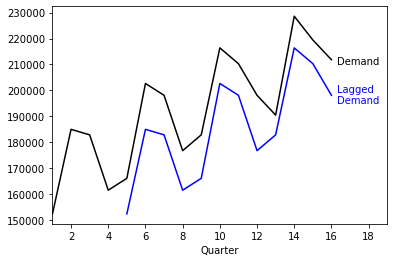

In [7]:
# create column with a lag of 4
lag = 4
df['lag4'] = np.NaN
for i in range(len(df['lag4']))[lag:]:
    df['lag4'].iloc[i] = df['Product1Demand'].iloc[i-4]
print(df.head(n=10))

# Compute autocorrelations
for i in range(int(len(df.index)/2)):
    print('autocorrelation, lag=',i,':',df.R1.autocorr)

fig,ax = plt.subplots()
ax.plot(df.Quarter,df.Product1Demand,c='k')
ax.plot(df.Quarter,df.lag4,c='b')
ax.set_xlim([1,19])
ax.text(16.3,210000,'Demand',color='k')
ax.text(16.3,195000,'Lagged\nDemand',color='b')
ax.set_xlabel('Quarter')


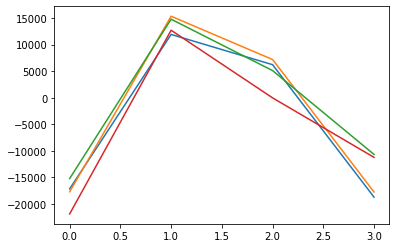

In [8]:
dfQtr = pd.DataFrame()
cycleLen = 4
for i in range(int(len(df.index)/cycleLen)):
    newData = pd.DataFrame({i:df['R1'].iloc[i*cycleLen:(i+1)*cycleLen]})
    newData.index = range(0,len(newData))
    dfQtr = pd.concat([dfQtr,newData],axis=1)

fig,ax = plt.subplots()
ax.plot(dfQtr)

              0             1             2             3           avg
0 -17137.529412 -17692.588235 -15199.647059 -21850.705882 -17970.117647
1  11894.705882  15315.647059  14760.588235  12681.529412  13663.117647
2   6206.941176   7175.882353   5096.823529    -30.235294   4612.352941
3 -18696.823529 -17727.882353 -10662.941176 -11218.000000 -14576.411765


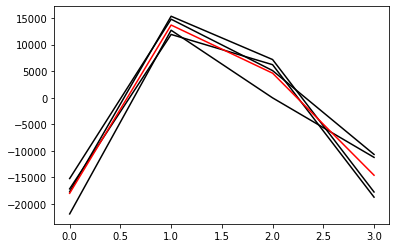

In [9]:
avg = []
for i in range(len(dfQtr.index)):
    avg.append(dfQtr.iloc[i].mean())

dfQtr = pd.concat([dfQtr,pd.DataFrame({'avg':avg})],axis=1)
print(dfQtr)

fig,ax = plt.subplots()
c = 180
for col in dfQtr.columns.values:
    if col == 'avg':
        ax.plot(dfQtr[col],c='r')
    else:
        ax.plot(dfQtr[col],c='k')

In [10]:
df['S'] = np.NaN
df['R2'] = np.NaN
df['Composite'] = np.NaN
df['errorPerc'] = np.NaN
S = dfQtr['avg'].tolist()
for i in df.index:
    df.loc[i,'S'] = S[i%cycleLen]
    df.loc[i,'R2'] = df.loc[i,'R1'] - df.loc[i,'S']
    df.loc[i,'Composite'] = df.loc[i,'regress'] + df.loc[i,'S']
    df.loc[i,'errorPerc'] = 100*df.loc[i,'R2'] / df.loc[i,'Product1Demand']
df.style.format({
    'Product1Demand': '{:,.0f}'.format,
    'regress': '{:.0f}'.format,
    'R1': '{:.0f}'.format,
    'lag4': '{:.0f}'.format,
    'S': '{:.0f}'.format,
    'R2': '{:.0f}'.format,
    'Composite': '{:.0f}'.format,
    'errorPerc': '{:.2f}'.format
})

,Quarter,Product1Demand,regress,R1,lag4,S,R2,Composite,errorPerc
0,1,"152,400",169538,-17138,nan,-17970,833,151567,0.55
1,2,"185,000",173105,11895,nan,13663,-1768,186768,-0.96
2,3,"182,880",176673,6207,nan,4612,1595,181285,0.87
3,4,"161,544",180241,-18697,nan,-14576,-4120,165664,-2.55
4,5,"166,116",183809,-17693,152400,-17970,278,165838,0.17
5,6,"202,692",187376,15316,185000,13663,1653,201039,0.82
6,7,"198,120",190944,7176,182880,4612,2564,195556,1.29
7,8,"176,784",194512,-17728,161544,-14576,-3151,179935,-1.78
8,9,"182,880",198080,-15200,166116,-17970,2770,180110,1.51
9,10,"216,408",201647,14761,202692,13663,1097,215311,0.51


Text(0, 0.5, 'Demand/Sales')

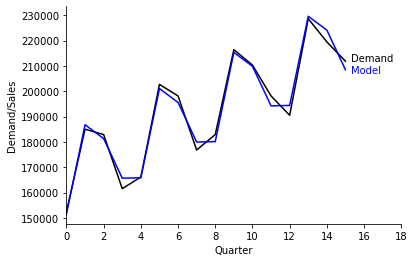

In [11]:
fig,ax = plt.subplots()
ax.plot(df['Product1Demand'],c='k')
ax.plot(df.Composite,c='b')
ax.set_xlim([0,18])
ax.text(15.3,212000,'Demand',color='k')
ax.text(15.3,207000,'Model',color='b')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Quarter')
ax.set_ylabel('Demand/Sales')

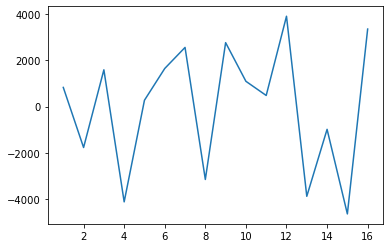

In [12]:
plt.plot(df.Quarter,df.R2)

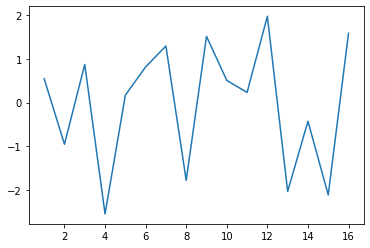

In [13]:
plt.plot(df.Quarter,df.errorPerc)

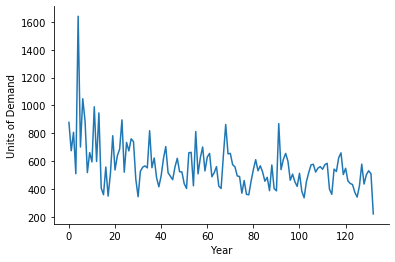

In [91]:
dfHs = pd.read_csv('homeSales.csv')

fig,ax = plt.subplots()
ax.plot(dfHs.homeSales,label='HomeSales')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Average Squared Error per Month 12990.722102901871
           YearMonth  homeSales      MovAvg         sqErr
2009-02-28   2009-02        509  673.916667  27197.506944
2009-03-31   2009-03        782  668.666667  12844.444444
2009-04-30   2009-04        536  663.430556  16238.546489
2009-05-31   2009-05        638  657.611111    384.595679
2009-06-30   2009-06        686  640.375000   2081.640625
...              ...        ...         ...           ...
2016-10-31   2016-10        541  501.930556   1526.421489
2016-11-30   2016-11        574  498.972222   5629.167438
2016-12-31   2016-12        584  495.708333   7795.418403
2017-01-31   2017-01        398  492.736111   8974.930748
2017-02-28   2017-02        361  488.138889  16164.297068

[97 rows x 4 columns]


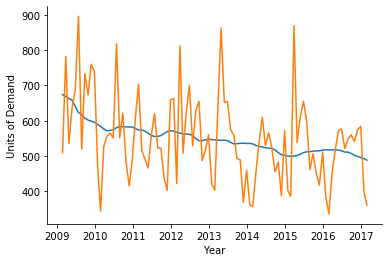

In [92]:
def sqErr(row):
    return (row['homeSales'] - row['MovAvg'])**2

dfHs['MovAvg'] = np.NaN
dfHs['sqErr'] = np.NaN
# changing the DataFrame index to DatetimeIndex
dfHs.index = pd.DatetimeIndex(freq='m',data=pd.date_range(freq='m',start=pd.Timestamp(year=2007,month=8,day=31),periods=len(dfHs.homeSales)))

window = 36
window = window - window % 2
# compute the moving average in the loop below using a window centered on the data point whose average is being computed
for i in range(int(window/2),dfHs.shape[0]-int(window/2)):
    dfHs.loc[dfHs.index[i],'MovAvg'] = (0.5*dfHs.iloc[i - int(window/2)]['homeSales'] + dfHs.iloc[i - int(window/2)+1:i + int(window/2)]['homeSales'].sum() + 0.5*dfHs.iloc[i + int(window/2)]['homeSales'])/float(window)

dfHs['sqErr'] = (dfHs['homeSales'] - dfHs['MovAvg'])**2
# Squared error can be computed also with dfHs.apply() method below
# Using dfHs.apply() in this case is an unnecessary complexity, but it is a good function to know about
# dfHs['sqErr'] = dfHs.apply(sqErr,axis='columns')

# The moving average cannot be applied to all rows and we need to delete those rows because we can't use them in the analysis
# dfHs.dropna(how='any',inplace=True)
dfHs.dropna(how='any',axis='rows',inplace=True)

fig,ax = plt.subplots()
ax.plot(dfHs.MovAvg, label='Moving Average')
ax.plot(dfHs.homeSales, label='Home Sales')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month', sum(dfHs['sqErr'])/len(dfHs.index))
print(dfHs)

In [64]:
dfHs['R1'] = dfHs['homeSales'] - dfHs['MovAvg']
dfHs['R1Error'] = abs((dfHs['homeSales'] - dfHs['R1'])/dfHs['homeSales'])
dfHs.style.format({
    'MovAvg':'{:,.1f}'.format,
    'sqErr':'{:,.1f}'.format,
    'R1':'{:,.1f}'.format,
    'R1Error':'{:,.3f}'.format
})

,YearMonth,homeSales,MovAvg,sqErr,R1,R1Error
2009-02-28 00:00:00,2009-02,509,673.9,"27,197.5",-164.9,1.324
2009-03-31 00:00:00,2009-03,782,668.7,"12,844.4",113.3,0.855
2009-04-30 00:00:00,2009-04,536,663.4,"16,238.5",-127.4,1.238
2009-05-31 00:00:00,2009-05,638,657.6,384.6,-19.6,1.031
2009-06-30 00:00:00,2009-06,686,640.4,"2,081.6",45.6,0.933
2009-07-31 00:00:00,2009-07,896,623.3,"74,377.4",272.7,0.696
2009-08-31 00:00:00,2009-08,520,617.3,"9,473.8",-97.3,1.187
2009-09-30 00:00:00,2009-09,734,607.4,"16,023.3",126.6,0.828
2009-10-31 00:00:00,2009-10,673,601.9,"5,052.8",71.1,0.894
2009-11-30 00:00:00,2009-11,760,598.8,"25,970.2",161.2,0.788


Average Residual:  -0.8771477663230256


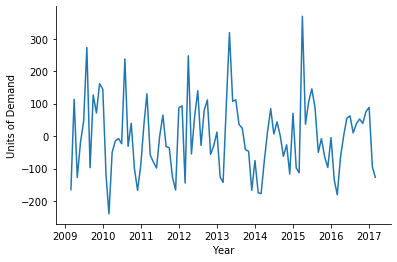

In [65]:
fig,ax = plt.subplots()
ax.plot(dfHs.R1)
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(dfHs.R1)/len(dfHs))

In [66]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfHs.R1.autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'    Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.1767051114808013
Correlation, lag  2     0.07347623986911382
Correlation, lag  3     0.03532540121669157
Correlation, lag  4     -0.14207381877846786
Correlation, lag  5     -0.18618385179297803
Correlation, lag  6     -0.08805018522480043
Correlation, lag  7     -0.22918409185474736
Correlation, lag  8     -0.16219610042616106
Correlation, lag  9     -0.05110534430338662
Correlation, lag  10     -0.031346918000384465
Correlation, lag  11     0.0047969420134657504
Correlation, lag  12     0.2233428653838815
Correlation, lag  13     0.08325517890220481
Correlation, lag  14     0.03310547818184568
Correlation, lag  15     0.03992377536160384
Correlation, lag  16     -0.12948720982726264
Correlation, lag  17     -0.2492867189198875
Correlation, lag  18     -0.13764333839233678
Correlation, lag  19     -0.1436899473338608
Correlation, lag  20     0.002291087819791821
Correlation, lag  21     0.05299117647211132
Correlation, lag  22     -0.11362212934985398
Correla

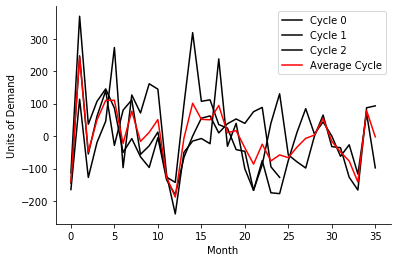

In [67]:
period = 36
cycleLen = period
numCycles = int(len(dfHs)/cycleLen+0.5)
cycles = [dfHs.iloc[range(i*period,min((i+1)*period,len(dfHs)))]['R1'] for i in range(numCycles)]
ptsInCycles = [dfHs.iloc[range(i,len(dfHs['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Month')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

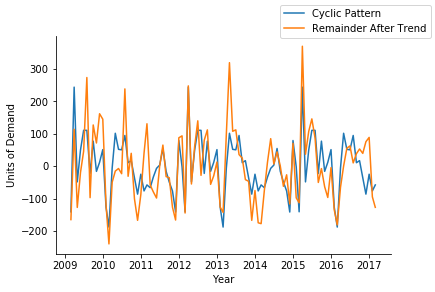

In [68]:
cycleLen = period
numCycles = int(len(dfHs)/cycleLen+0.5)
dfHs['C'] = np.NaN
for i in range(len(dfHs)):
    dfHs.loc[dfHs.index[i],'C'] = avg[i % cycleLen]

fig,ax = plt.subplots()
ax.plot(dfHs.C,label='Cyclic Pattern')
ax.plot(dfHs.R1,label='Remainder After Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Average Error:  0.10588656173826713
           YearMonth  homeSales      MovAvg          R1   R1Error           C  \
2009-02-28   2009-02        509  673.916667 -164.916667  1.324001 -140.893519   
2009-03-31   2009-03        782  668.666667  113.333333  0.855072  243.157407   
2009-04-30   2009-04        536  663.430556 -127.430556  1.237744  -48.750000   
2009-05-31   2009-05        638  657.611111  -19.611111  1.030738   49.513889   
2009-06-30   2009-06        686  640.375000   45.625000  0.933491  110.106481   
...              ...        ...         ...         ...       ...         ...   
2016-10-31   2016-10        541  501.930556   39.069444  0.927783  -36.226852   
2016-11-30   2016-11        574  498.972222   75.027778  0.869290  -86.462963   
2016-12-31   2016-12        584  495.708333   88.291667  0.848816  -25.111111   
2017-01-31   2017-01        398  492.736111  -94.736111  1.238030  -76.597222   
2017-02-28   2017-02        361  488.138889 -127.138889  1.352185  -58.08

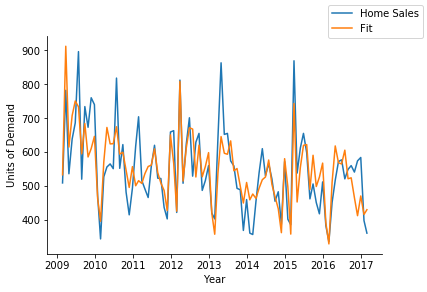

In [69]:
dfHs['R2'] = dfHs.R1 - dfHs.C
dfHs['R2Error'] = abs(dfHs['R2']/dfHs['homeSales'])
dfHs['fit'] = dfHs['MovAvg'] + dfHs['C']
dfHs.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ',sum(dfHs.R2Error)/len(dfHs))
print(dfHs)
fig,ax = plt.subplots()
ax.plot(dfHs.homeSales,label='Home Sales')
ax.plot(dfHs.fit,label='Fit')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

Correlation, lag 1     0.3435649269460318
Correlation, lag 2     0.1074893799817995
Correlation, lag 3     -0.16608281570343564
Correlation, lag 4     -0.14808217657631095
Correlation, lag 5     -0.1235601720987361
Correlation, lag 6     -0.1189067989785123
Correlation, lag 7     -0.06938090824680586
Correlation, lag 8     -0.1965026198877814
Correlation, lag 9     -0.2805118800662205
Correlation, lag 10     -0.12293022668024646
Correlation, lag 11     -0.053795172944604314
Correlation, lag 12     0.08240595803547454
Correlation, lag 13     -0.06840223246549804
Correlation, lag 14     0.13631937020853702
Correlation, lag 15     0.033624701783362694
Correlation, lag 16     -0.05388591556649992
Correlation, lag 17     -0.1430072714700808
Correlation, lag 18     0.07673524009547426
Correlation, lag 19     0.23345950485260702
Correlation, lag 20     0.042985147712573835
Correlation, lag 21     -0.0691499165402792
Correlation, lag 22     -0.23380100874219592
Correlation, lag 23     -0.07847

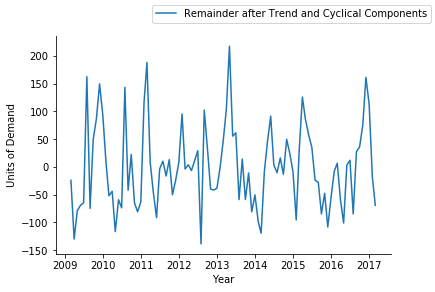

In [72]:
fig,ax = plt.subplots()
ax.plot(dfHs.R2,label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = dfHs['R2'].autocorr(lag=i)
    print('Correlation, lag',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'   Maximum Correlation = ',maxCorr)

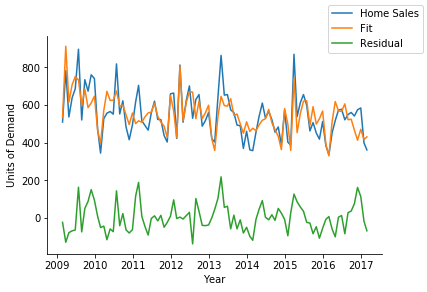

In [73]:
fig,ax = plt.subplots()
ax.plot(dfHs.homeSales,label='Home Sales')
ax.plot(dfHs.fit,label='Fit')
ax.plot(dfHs.R2,label='Residual')
ax.set_xlabel('Year')
ax.set_ylabel('Units of Demand')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

In [74]:
for a in [0.1 * i for i in range(1,20)]:
    dfHs['aC'] = a*dfHs['C']
    dfHs['R3'] = dfHs['R1'] - dfHs['aC']
    dfHs['sqErr'] = dfHs['R3']**2
    print('Squared Error for a =','{:.1f}'.format(a),':',sum(dfHs.sqErr))

Squared Error for a = 0.1 : 1122702.832199074
Squared Error for a = 0.2 : 999768.4848148153
Squared Error for a = 0.3 : 891297.0018287036
Squared Error for a = 0.4 : 797288.3832407407
Squared Error for a = 0.5 : 717742.6290509261
Squared Error for a = 0.6 : 652659.7392592594
Squared Error for a = 0.7 : 602039.7138657409
Squared Error for a = 0.8 : 565882.5528703708
Squared Error for a = 0.9 : 544188.2562731483
Squared Error for a = 1.0 : 536956.8240740743
Squared Error for a = 1.1 : 544188.2562731481
Squared Error for a = 1.2 : 565882.5528703702
Squared Error for a = 1.3 : 602039.7138657405
Squared Error for a = 1.4 : 652659.7392592593
Squared Error for a = 1.5 : 717742.6290509258
Squared Error for a = 1.6 : 797288.3832407407
Squared Error for a = 1.7 : 891297.001828704
Squared Error for a = 1.8 : 999768.4848148145
Squared Error for a = 1.9 : 1122702.8321990743
